In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from main import load_and_prepare_sessions
from config import *

import numpy as np
import matplotlib.pyplot as plt

sessions = load_and_prepare_sessions("../../Baseline", load_from_pickle=True, remove_bad_signal_sessions=True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


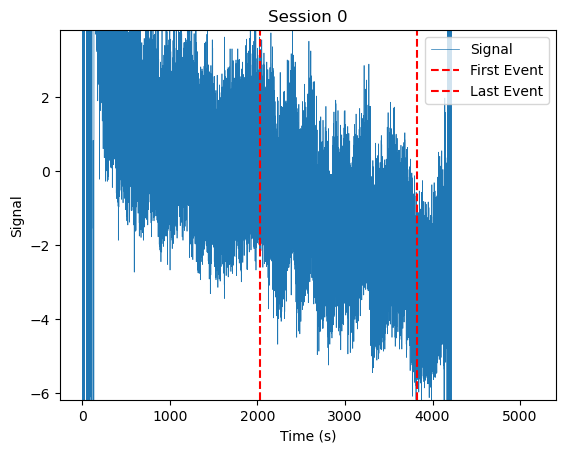

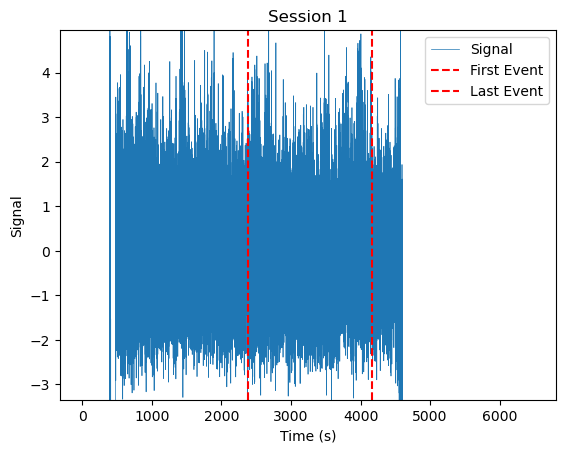

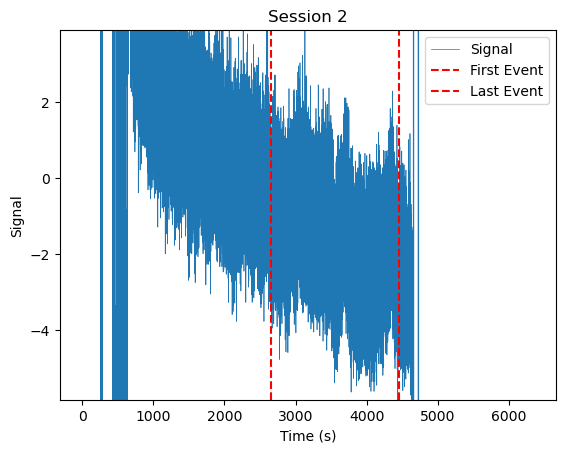

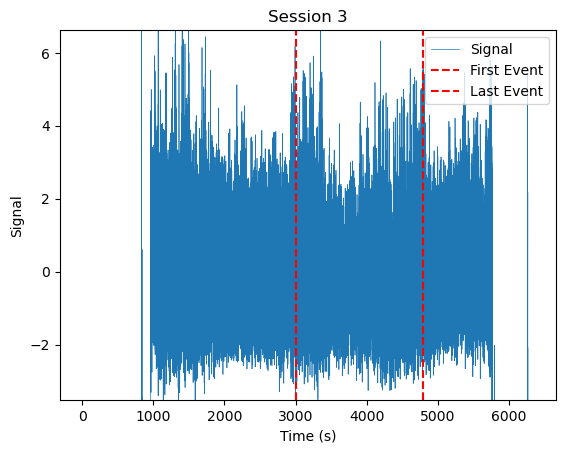

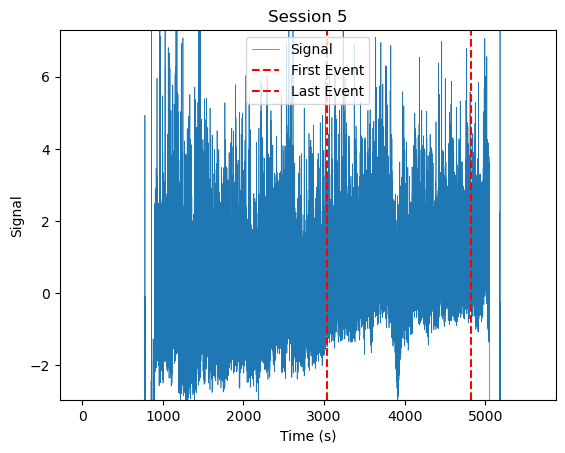

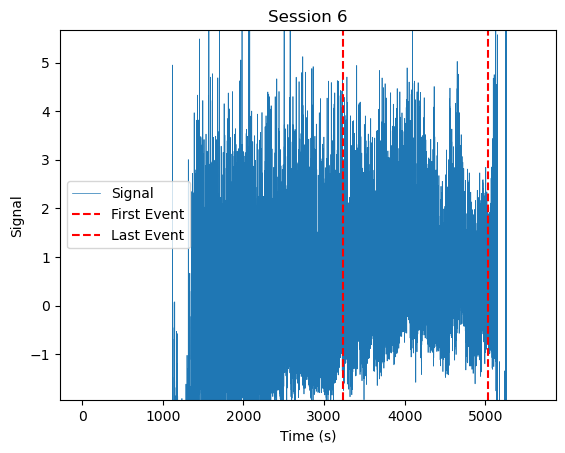

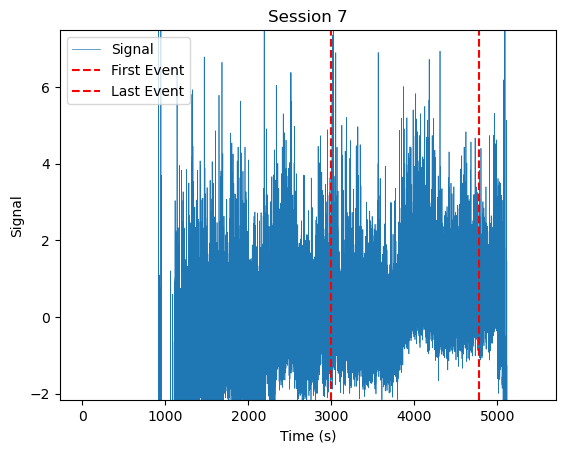

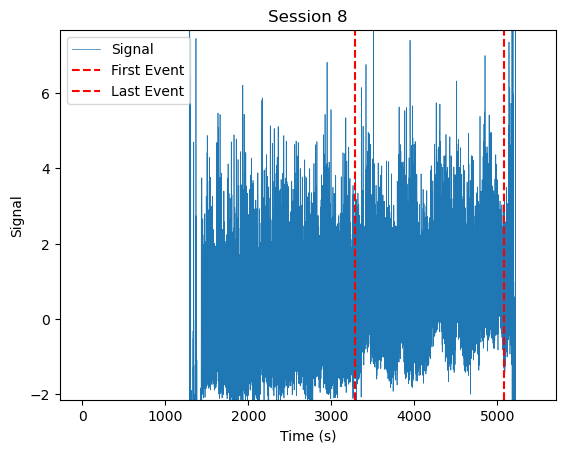

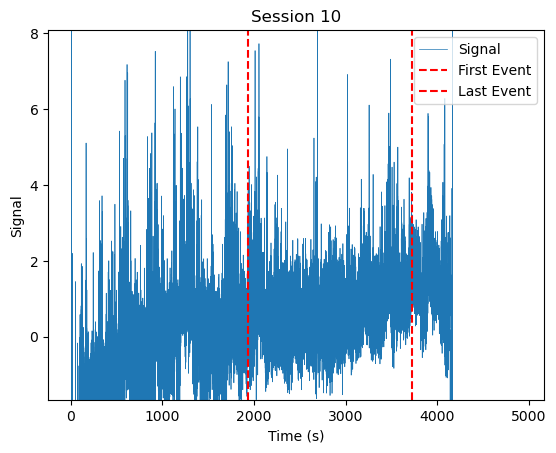

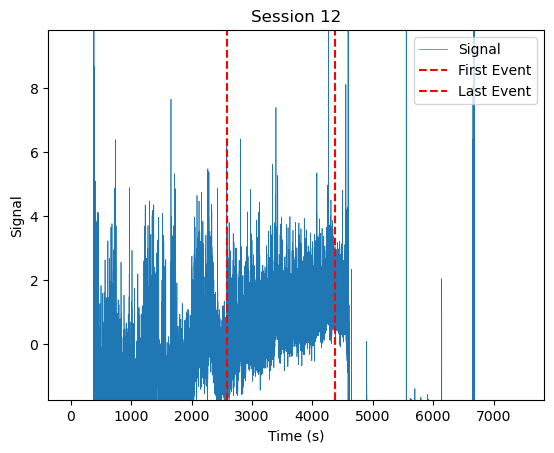

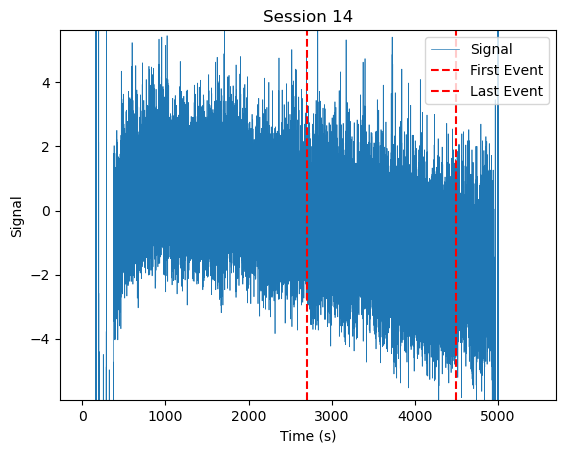

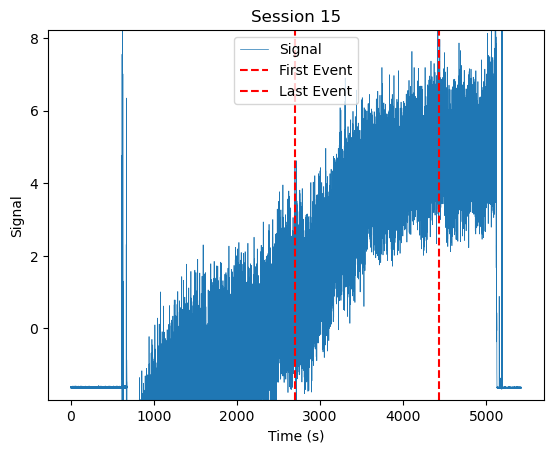

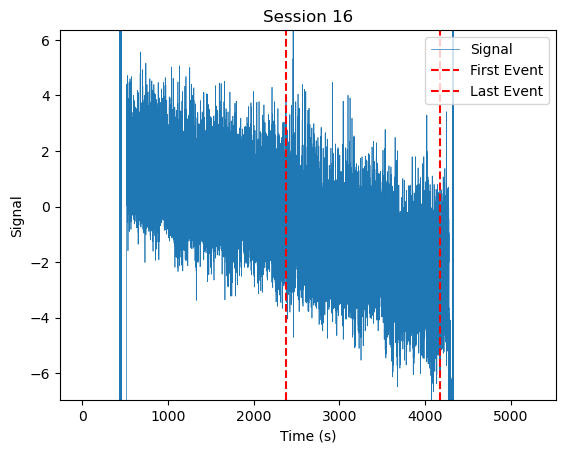

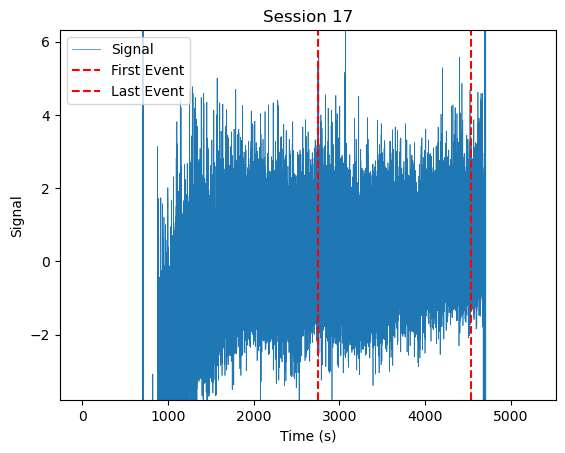

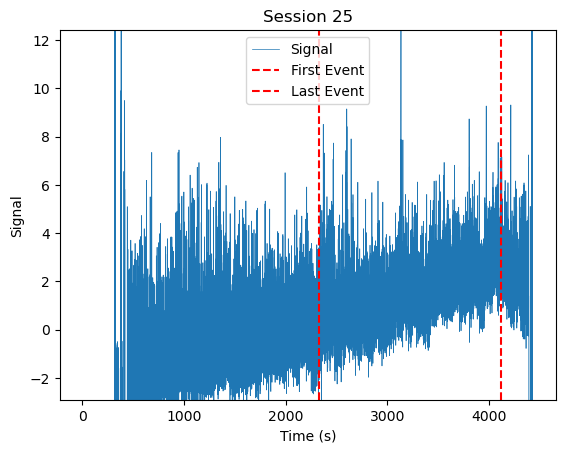

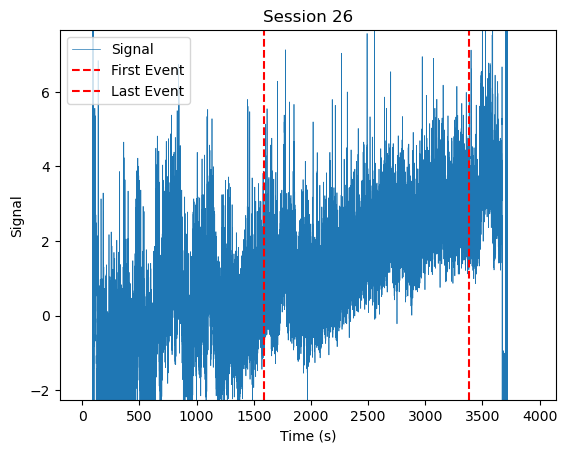

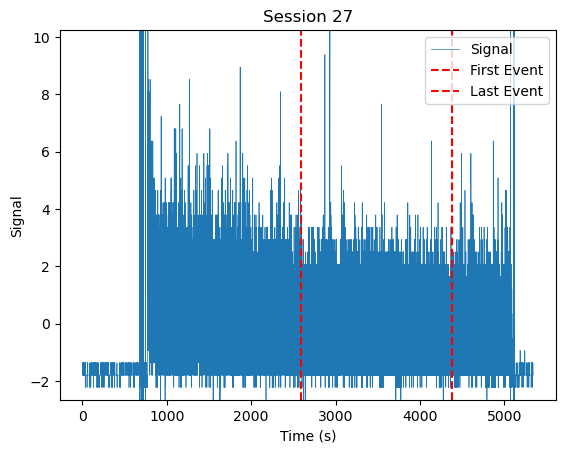

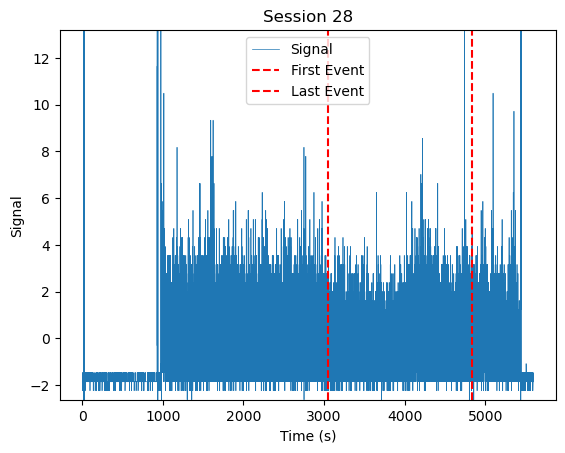

In [3]:
def plot_session_events_and_signal_matplotlib(session, brain_reg, ax, title_suffix=""):
    phot_df = session.df_container.data['photwrit_470']
    raw_df = session.df_container.data['raw']
    filtered_df = raw_df.loc[session.events_of_interest_df["index"]]

    signal = phot_df[f'{brain_reg}_phot_zF']
    #signal = savgol_filter(signal, 10, 3)  # Apply Savitzky-Golay filter
    phot_times = phot_df['SecFromZero_FP3002'].values
    event_times = filtered_df['SecFromZero_FP3002'].values

    # Plot the photometry signal
    ax.plot(phot_times, signal, label='Signal', linewidth=0.5)

    # Plot a vertical line at the first event time
    if len(event_times) > 0:
        first_event_time = event_times[0]
        ax.axvline(x=first_event_time, color='red', linestyle='--', label='First Event')
        last_event_time = event_times[-1]
        ax.axvline(x=last_event_time, color='red', linestyle='--', label='Last Event')

        # Set y-axis limits to the minimum and maximum value of the signal between first and last event time
        signal_between_events = signal[(phot_times >= first_event_time) & (phot_times <= last_event_time)]
        ax.set_ylim(np.min(signal_between_events), np.max(signal_between_events))
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Signal')
    ax.set_title(f"Session {title_suffix}")
    ax.legend()

for idx, session in enumerate(sessions):
    if 'DLS_left' in session.brain_regions:
        dls_key = 'DLS_left'
    elif 'DLS_right' in session.brain_regions:
        dls_key = 'DLS_right'
    else:
        continue
    fig, ax = plt.subplots() 
    plot_session_events_and_signal_matplotlib(session, dls_key, ax, idx)
    plt.show() 


In [6]:
sessions[29].trial_id, sessions[29].mouse_id

('T20_31.33.43.45', '31')